In [4]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import os
os.environ['PYSPARK_PYTHON'] = '/opt/conda/bin/python'

plt.rcParams["figure.figsize"] = (7,3.75)

# Data science & Python & Machine Learning

### Статистика

wifi: Photoplay Reserve / good-day-for-photoplay

### Pandas: join


In [5]:
df = pd.read_csv('titanic.csv')
survived_per_ticket = (df.groupby('Ticket').Survived
                       .mean()
                       .to_frame()
                       .rename(columns={'Survived': 'SurvivedPerTicket'})
                       .reset_index())
df.merge(survived_per_ticket, how='left').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedPerTicket
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


### Pandas: pivot table

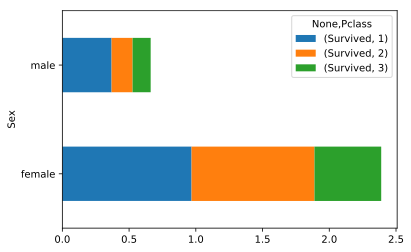

In [6]:
df.pivot_table(index=['Sex', 'Pclass'], values='Survived').unstack(1).plot.barh(stacked=True);

### Обработка больших данных

- Основной принцип: данные не помещаются в одну машину, нужна распределенность, то есть несколько машин
- Распределенность создает так много проблем, что нужно держаться без нее, пока это возможно
- Лучшая книга про эту область - Designing Data Intensive Applications

### Репликация и шардирование

- Шардирование: данные нужно разделять по машинам
- Репликация: при этом данные не должны попадать исключительно на одну машину
- Хорошая система хранения данных будет обеспечивать это за вас

### Hadoop

- Набор инструментов для работы с большими данными
- Фактически, реализация принципов, описанных инженерами Google в нескольких статьях
- Hadoop HDFS: распределенная файловая система, обеспечивающая правильную репликацию и шардирование данных
- Hadoop MapReduce: реализация одноименной модели программирования

### MapReduce

- Модель программирования, позволяющая обрабатывать данные параллельно
- Операция Map преобразует входные данные в пары (key, value)
- Данные группируются по key
- Операция Reduce отдельно обрабатывает все value для каждого key
- Ограничения модели позволяют выполнять шаги map и reduce распределенно

### Подсчет числа слов: шаг Map

In [51]:
def count_map(sentence):
    for word in sentence.split():
        yield {word: 1}
        
# паралллельно:
list(count_map("this is a sentence")),\
list(count_map("this is the sentence")),\
list(count_map("this is short sentence"))\

([{'this': 1}, {'is': 1}, {'a': 1}, {'sentence': 1}],
 [{'this': 1}, {'is': 1}, {'the': 1}, {'sentence': 1}],
 [{'this': 1}, {'is': 1}, {'short': 1}, {'sentence': 1}])

In [53]:
mapped = {
    "this": [1, 1, 1],
    "is": [1, 1, 1],
    "a": [1],
    "the": [1],
    "short": [1],
    "sentence": [1, 1, 1],
}

### Подсчет числа слов: шаг Reduce

In [57]:
def count_reduce(key, values):
    return {key: sum(values)}

# параллельно:
count_reduce('this', mapped['this']),\
count_reduce('is', mapped['is']),\
count_reduce('a', mapped['a'])

({'this': 3}, {'is': 3}, {'a': 1})

### Spark

- MapReduce хорошо подходит для массивных простых вычислений
- Часто вычисления сложны и строятся итеративно
- Apache Spark позволяет делать вычисления быстрее и не ограничивать себя моделью MapReduce

### Подключение к кластеру Spark 

In [66]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("MyApp").setMaster("spark://jupyter.digitaltech.school:7077")
sc = SparkContext(conf=conf)

KeyboardInterrupt: 

### Подсчет слов в Spark

In [ ]:
text_file = sc.textFile("file:///home/pdsml-02/test.txt")
 
text_file.flatMap(lambda line: line.split())\
    .map(lambda word: (word, 1))\
    .reduceByKey(lambda a, b: a+b)\
    .collect()

### Форматы данных

- JSON и XML имеют свои недостатки, самый главный - избыточность 
- Для хранения однотипных данных используют Protobuf, Thrift, Avro и другие
- Часто данные выгодно сжимать

# Случайность

### Зачем нам случайность?

- Случайность - наша модель, упрощающая моделирование
- Случайным обычно называют то, что трудно или нельзя посчитать точно
- Самой случайности в природе почти нет

### Случайные величины

- Простое определение: переменная, которая может принимать разные значения когда мы её наблюдаем
- В анализе данных все переменные удобно рассматривать как случайные величины
- Самая важная характеристика - вероятность

### Вероятность $P(x)$

- Объективная вероятность (предмет классической статистики) — доля случаев, когда случайная величина приняла некоторое значение
- Субъективная вероятность (предмет байесовской статистики) — уверенность, что случайная величина примет некоторое значение
- Численная мера от 0 до 1
- Сумма вероятностей по всем возможным исходам равна 1

### Классическая вероятность

Посчитаем "вероятности" выжить $P(Survived=1)$ и не выжить $P(Survived=0)$ на Титанике:

In [7]:
df = pd.read_csv('titanic.csv')
df.Survived.mean(), 1.0 - df.Survived.mean() 

(0.3838383838383838, 0.6161616161616161)

Это не совсем вероятность

### Дискретные случайные величины

Принимает конечное число разных значений.

Можно описать таблицей:

In [8]:
pd.DataFrame([{'value': 'Black', 'p': 0.75}, {'value': 'White', 'p': 0.25}])

,p,value
0,0.75,Black
1,0.25,White


### Распределение Бернулли

Конверсия пользователя (0/1)

In [9]:
np.random.randint(0, 2), np.random.randint(0, 2)

(0, 0)

Проверим "вероятность":

In [10]:
N = 100
sum(np.random.randint(0, 2) for _ in range(N)) / N

0.64

### Биномиальное распределение

Количество конверсий в нашем интернет-магазине среди N посещений (0,1,...,N)

In [11]:
np.random.randint(0, 2) + np.random.randint(0, 2) + np.random.randint(0, 2) + np.random.randint(0, 2)

1

### Распределения Пуассона

Количество неполадок в системе за фиксированный момент времени

In [12]:
np.random.poisson(size=10)

array([0, 0, 2, 0, 2, 1, 2, 1, 1, 1])

### Непрерывные случайные величины

- Имеет бесконечное множество значений
- Нельзя сформировать таблицу вероятностей
- Вероятность попасть в каждую конкретную точку 0!
- Единственное, что можно задать - вероятность попасть в интервал

#### Функция вероятности (CDF): $F(x) = P(X \leqslant x)$

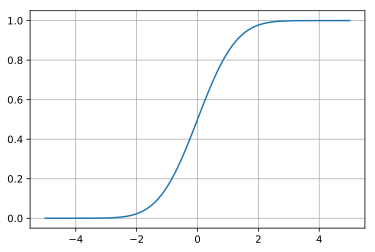

In [13]:
xs = np.linspace(-5, 5, num=100)
plt.plot(xs, st.norm.cdf(xs)); plt.grid()

#### Плотность вероятности (PDF): $f(x) = \frac{d}{dx} F(x)$

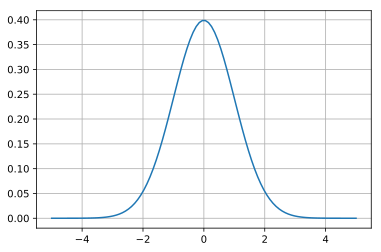

In [14]:
xs = np.linspace(-5, 5, num=100)
plt.plot(xs, st.norm.pdf(xs)); plt.grid()

### Гистограмма

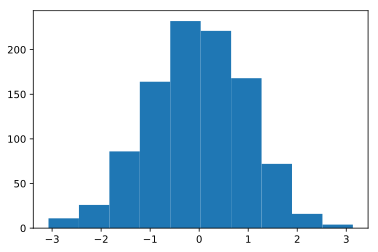

In [15]:
sample = np.random.randn(1000)
plt.hist(sample);

Гистограмма $\to$ плотность

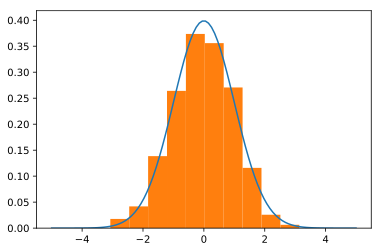

In [16]:
xs = np.linspace(-5, 5, num=100)
plt.plot(xs, st.norm.pdf(xs))
plt.hist(sample, normed=True);

### Эмпирическая функция распределения

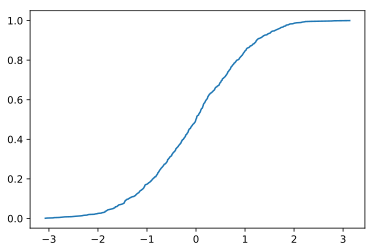

In [17]:
xs_ecdf = np.sort(sample)
ys_ecdf = np.arange(1, len(xs_ecdf)+1)/float(len(xs_ecdf))
plt.plot(xs_ecdf, ys_ecdf);

### Центральная Предельная Теорема

Сумма большого числа *слабо зависимых* случайных величин имеет распределение, близкое к нормальному

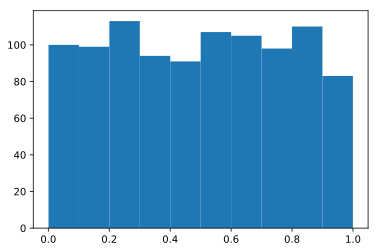

In [18]:
sample = np.random.sample(1000)
plt.hist(sample);

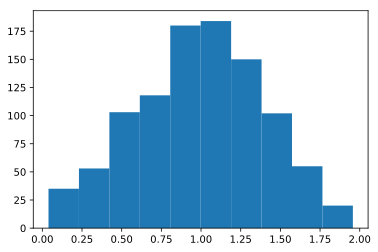

In [19]:
sample = np.random.sample(1000) + np.random.sample(1000) 
plt.hist(sample);

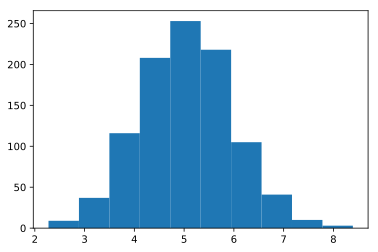

In [20]:
sample = sum(np.random.sample(1000) for _ in range(10))
plt.hist(sample);

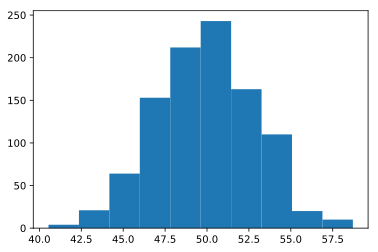

In [21]:
sample = sum(np.random.sample(1000) for _ in range(100))
plt.hist(sample);

**Вывод:** при большом количестве факторов предположение о нормальности - ОК!

Очень часто такое предположение не так явно

### Выборка Adult

In [22]:
df = pd.read_csv('adult.csv')
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Выборочная статистика

- Любая функция от выборки
- Примеры: максимум, минимум, среднее, медиана

In [23]:
df.age.max(), df.age.min(), df.age.mean(), df.age.median()

(90, 17, 38.64358543876172, 37.0)

### Квантиль

(-0.5613401123301072, 0.301)

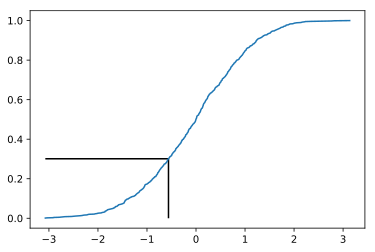

In [27]:
plt.plot(xs_ecdf, ys_ecdf); x, y = xs_ecdf[300], ys_ecdf[300]
plt.hlines(y, min(xs_ecdf), x); plt.vlines(x, 0, y)
x, y

#### Квантиль, перцентиль и квартиль

In [28]:
df.age.quantile(q=0.25)

28.0

In [29]:
np.percentile(df.age, q=25)

28.0

In [30]:
df.age.quantile(q=1/4)

28.0

### Закон Больших Чисел

*Выборочное среднее* сходится к *математическому ожиданию* с ростом размера выборки

Почти всегда мы работаем там, где среднее *еще не сошлось*

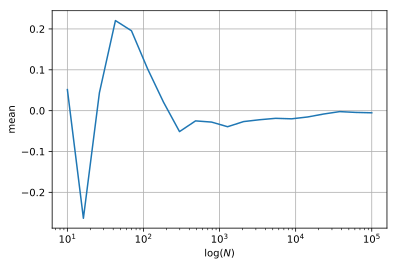

In [31]:
ns = np.logspace(1, 5, num=20)
sample = np.random.randn(int(ns.max()))
means = [sample[:int(n)].mean() for n in ns]
plt.plot(ns, means); plt.xscale('log'); plt.grid(); plt.xlabel('$\log(N)$'); plt.ylabel('mean');

### Смещенность (bias)

- Некоторые статистики могут не сходиться к соответствующему теоретическому значению
- Например, среднеквадратичное отклонение с $\frac{1}{n}$
- Иногда полезно иметь небольшой bias (sic!)

### Дисперсия оценки (variance)

- В зависимости от выборки статистика может принимать разные значения
- Разброс этих значений и есть variance
- Есть некоторое противоречие с bias: bias-variance tradeoff, важное понятие статистики и машинного обучения

### Полезный bias: сглаживание Лапласа

- Оценка вероятности превращается из $\frac{n}{N}$ в $\frac{n+1}{N+1}$
- Новые слова получают ненулевые вероятности

### Тестирование гипотез

- Задаем противоречивые гипотезы $H_0$ (null) и $H_1$
- $H_0$ - зависимости нет, лекарство не работает, алгоритм не улучшает продажи
- Получаем значение статистики $D$ - данные
- Тривиально, если мы знаем $P(D | H_1)$, но мы не знаем

### p-value

- Вероятность получить такие же или более "сильные" данные $D$, если $H_0$ верна: $P(D|H_0)$
- $p < 0.05$ позволяет нам считать, что $H_0$ не верна (значит можно принять $H_1$)
- Гипотеза либо отвергается, либо нет: промежуточных вариантов нет!

Вычислим разницу в средних возрастах между мужчинами и женчинами:

In [32]:
condition = (df.gender == 'Male')
df[condition].age.mean(), df[~condition].age.mean()

(39.49439509954058, 36.92798913043478)

In [33]:
d = df[condition].age.mean() - df[~condition].age.mean()
d

2.5664059691058014

### Классическая статистика

- Средний возраст распределен нормально (почему?)
- Для оценки p-value такой ситуации есть t-test Стьюдента:

In [36]:
from scipy.stats import ttest_ind
ttest_ind(df[condition].age, df[~condition].age).pvalue

8.649484312722566e-85

Что делать, если не хочется думать?

Смоделируем ситуацию, когда $H_0$ **точно верна**. Это можно обеспечить случайной перестановкой возраста **независимо** от остальных столбцов:

In [74]:
permutation = np.random.permutation(df.shape[0])
u = df.age.take(permutation).values[condition].mean()
v = df.age.take(permutation).values[~condition].mean()
u - v

0.018656160529999966

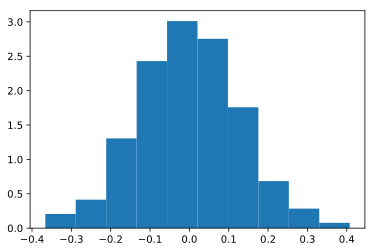

In [75]:
diffs = []
for _ in range(1000):
    permutation = np.random.permutation(df.shape[0])
    u = df.age.take(permutation).values[condition].mean()
    v = df.age.take(permutation).values[~condition].mean()
    diffs.append(u - v)
    
plt.hist(diffs, normed=True);

(-2.8230465660163815, 2.8230465660163815, 0.0, 3.1626735781127966)

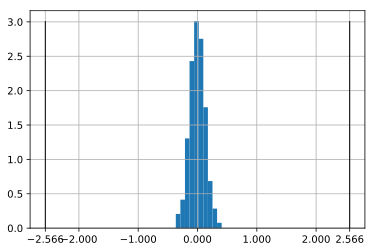

In [76]:
plt.grid();
h = plt.hist(diffs, normed=True)
plt.vlines([-d, d], 0, h[0].max(), lw=1); plt.xticks(list(plt.xticks()[0]) + [-d, d]); plt.axis('tight')

### Bootstrapping

Семейство методов, основанных на sampling with replacement, случайной выборке с возвратом, для генерации "вспомогательных" данных

In [77]:
df.sample(frac=1, replace=True).age.mean()

38.67280209655624

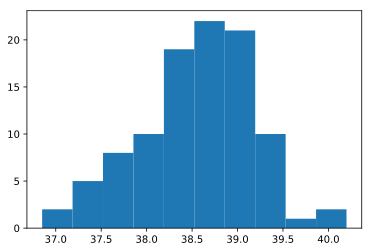

In [78]:
df = df.sample(frac=0.01)
means = [df.sample(frac=1, replace=True).age.mean() for _ in range(100)]
plt.hist(means);

Стало легко посчитать доверительный интервал с надежностью 95%:

In [79]:
np.percentile(means, 2.5), np.percentile(means, 97.5)

(37.359836065573774, 39.535502049180323)

Такой интервал с 95% вероятностью покроет *правильное* значение на другой выборке с тем же распределением